# **Newyork Airbnb - Data Cleaning and Feature Engineering**

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [4]:
# from google.colab import drive
#
# drive.mount('/content/drive')


Mounted at /content/drive


### Importing Dataset:

In [4]:
df = pd.read_csv('NY-Airbnb.csv')


### EDA:
This part of the dataset provides a glimpse of the information, such as listing details (name, location, room type, price, etc.), which are essential for understanding the dataset.

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This provides information about the data types, non-null counts, and memory usage of each column:

- There are 48,895 entries (rows) and 16 columns.
- The data types include int64 (integer), float64 (floating-point), and object (string).
- Some columns have missing values, such as name, host_name, last_review, and reviews_per_month.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.shape

(48895, 16)

### **Data Cleaning**

####  Checking for Null and duplicated data

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
if df.duplicated().any():
    print(df.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

no duplicate.


#### Analysis:
- The dataset contains information about Airbnb listings in New York City.
- The neighbourhood_group, room_type, and other categorical columns can be useful for segmentation and analysis.
- There are missing values in some columns, such as name and last_review, which may need to be addressed during data cleaning.
- Descriptive statistics provide an overview of the distribution of numerical features.
- For further analysis, we can explore relationships between different features, identify outliers, and handle missing values. Additionally, visualizations can help provide a more intuitive understanding of the data.
- There is no duplicate data

#### Handling Null Values
##### Drop Rows with Null Values

In [11]:
# Drop rows with null values in 'name' and 'host_name'
df_cleaned = df.dropna(subset=['name', 'host_name'])

# Display information after dropping null values
print("Dataset information after dropping rows with null values:")
print(df_cleaned.info())
print('Checking for Null Values..')
df_cleaned.isnull().sum()

Dataset information after dropping rows with null values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               488

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see reviews_per_month and last_review null values are not handled yet, so we start to working on them.

In [12]:
print(df_cleaned['reviews_per_month'].describe())


count    38821.000000
mean         1.373229
std          1.680328
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64


The mean value (1.373229) gives us a representative measure of the central tendency, and using it to fill the missing values can help maintain the overall characteristics of the 'reviews_per_month' distribution

In [14]:
# Calculate the mean
mean_reviews_per_month = df_cleaned['reviews_per_month'].mean()

# Replace null values with the mean
df_cleaned['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Display information after handling null values
print("Dataset information after handling null values:")
print(df_cleaned.info())
df_cleaned.isnull().sum()


Dataset information after handling null values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-nul

C:\Users\Samin\AppData\Local\Temp\ipykernel_18624\4180668096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Convert 'last_review' to datetime
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'])

# Check data types again
print("Updated data types of columns:")
print(df_cleaned.dtypes)

Updated data types of columns:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


<ipython-input-9-d0dc96b8f9d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'])


#### Checking last_review correlation with other features:

In [10]:
# Check the correlation matrix
correlation_matrix = df_cleaned.corr()

correlation_matrix

<ipython-input-10-3ad27107c8d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.253245,0.133224,0.085616
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.254936,0.154954,0.203743
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.009095,0.019548,-0.010775
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.131852,-0.114746,0.082754
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.022384,0.057460,0.081817
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.094235,0.131313,0.145953
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.529951,-0.072408,0.171855
reviews_per_month,0.253245,0.254936,-0.009095,0.131852,-0.022384,-0.094235,0.529951,1.000000,-0.006715,0.163084
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.006715,1.000000,0.225784
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.163084,0.225784,1.000000


#### if 'last_review' is not present in the correlation matrix, it suggests that there is no linear correlation between 'last_review' and the other numerical features in the dataset. Thus, we decied to drop this feature.

In [15]:
# # Drop the 'last_review' column
df_cleaned = df_cleaned.drop(['last_review'], axis=1)

# Display information after dropping the column
print("Dataset information after dropping the 'last_review' column:")
print(df_cleaned.info())
df_cleaned.isnull().sum()


Dataset information after dropping the 'last_review' column:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Handling Outliers

To identify outliers we will use multiple methods:

#### **Numerical Features**

##### Boxplots

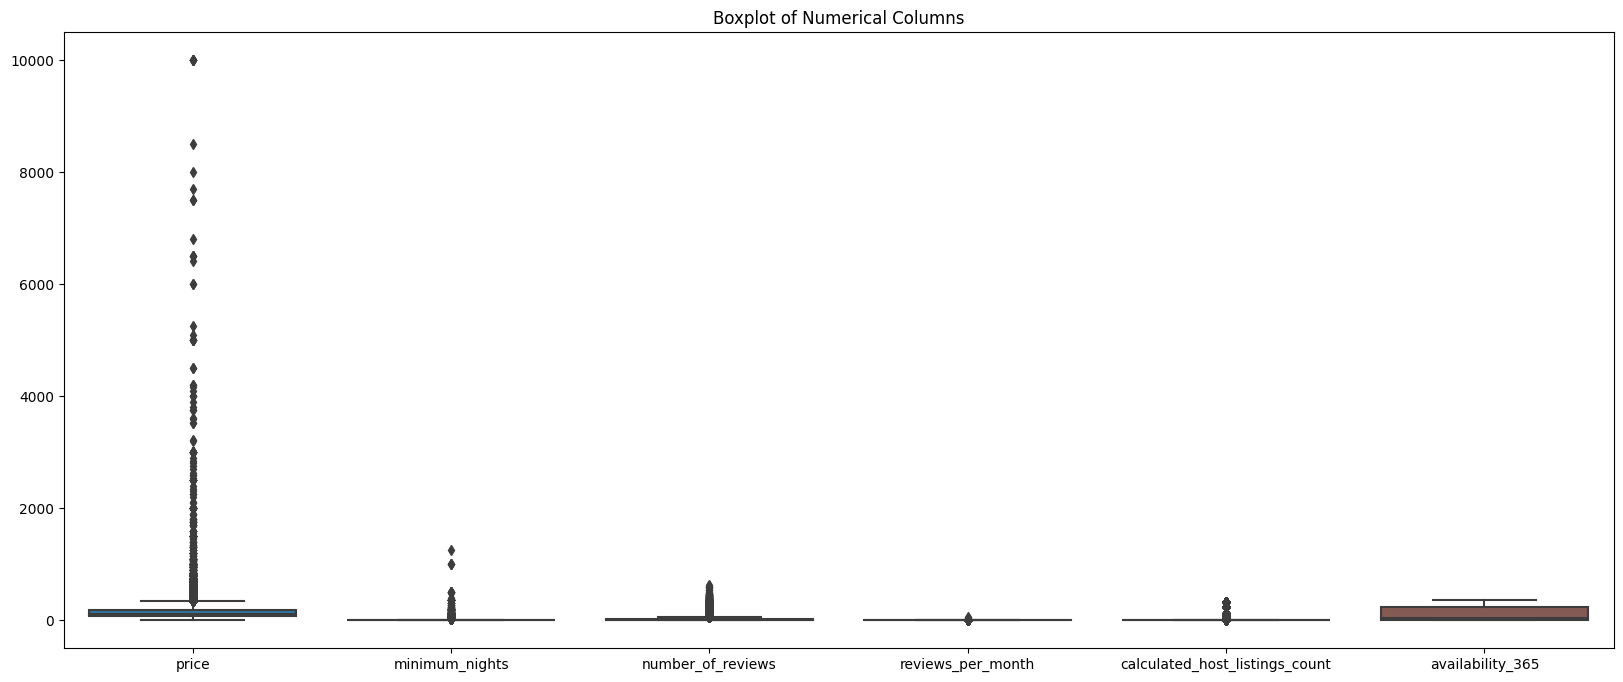

In [16]:

# Select relevant numerical columns
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Create boxplots
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_cleaned[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()


##### IQR (Interquartile Range)
The IQR is another method for identifying outliers. It involves calculating the range between the first quartile (25th percentile) and the third quartile (75th percentile) and considering values outside this range as potential outliers.

In [17]:
# Calculate the IQR for selected columns
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR)))

# Display the number of outliers in each column
print("Number of outliers in each column:")
print(outliers.sum())


Number of outliers in each column:
price                             2971
minimum_nights                    6605
number_of_reviews                 6015
reviews_per_month                 4099
calculated_host_listings_count    7080
availability_365                     0
dtype: int64


In [18]:
df_cleaned.shape

(48858, 15)

In [24]:
# Remove rows with outliers
df_no_outliers = df_cleaned[~outliers.any(axis=1)]


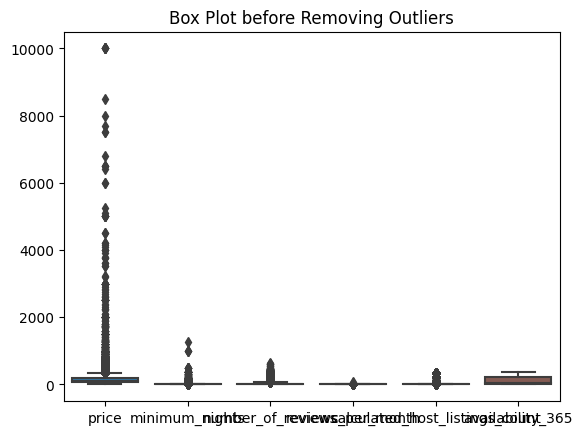

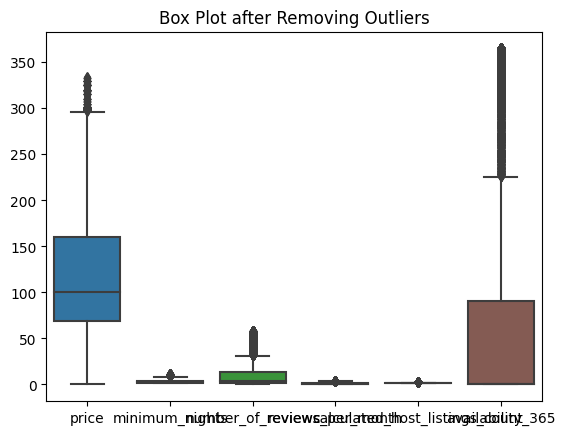

In [25]:
# Box plot before removing outliers
sns.boxplot(data=df_cleaned[numerical_columns])
plt.title("Box Plot before Removing Outliers")
plt.show()

# Box plot after removing outliers
sns.boxplot(data=df_no_outliers[numerical_columns])
plt.title("Box Plot after Removing Outliers")
plt.show()


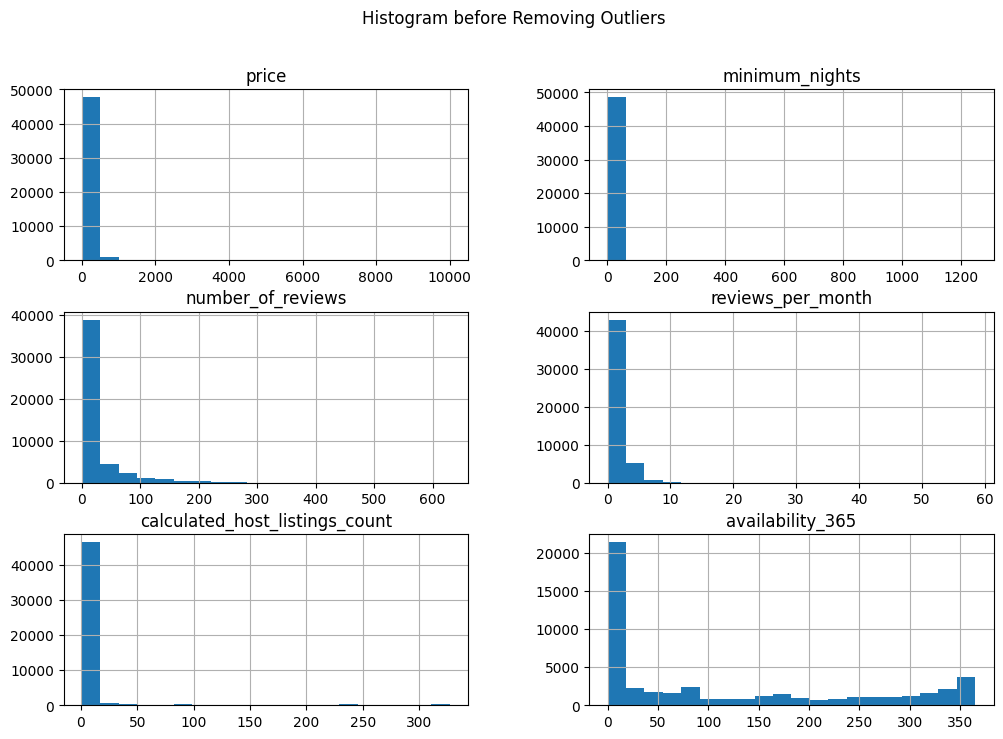

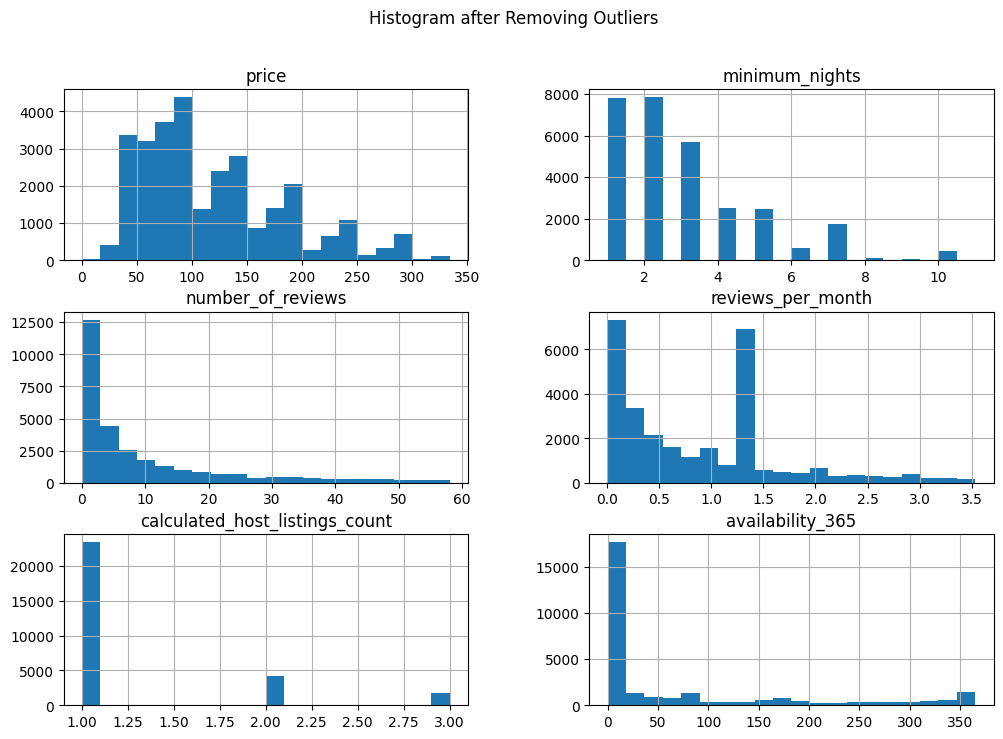

In [26]:
# Histogram before removing outliers
df_cleaned[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histogram before Removing Outliers")
plt.show()

# Histogram after removing outliers
df_no_outliers[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histogram after Removing Outliers")
plt.show()


In [27]:
# Assuming you have a DataFrame named data_no_outliers
data = df_no_outliers.copy()  # Use the copy method to avoid modifying the original DataFrame


#### Normalization
In this dataset, it appears that normalization might be beneficial for columns like 'latitude,' 'longitude,' 'price,' 'minimum_nights,' 'number_of_reviews,' 'reviews_per_month,' 'calculated_host_listings_count,' and 'availability_365.'

In [28]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373229,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.430000,1,6
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,1.373229,2,249


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to be normalized
columns_to_normalize = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                         'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the normalized dataset
print(data.head())


      id                                              name  host_id  \
1   2595                             Skylit Midtown Castle     2845   
2   3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
4   5022  Entire Apt: Spacious Studio/Loft by central park     7192   
10  5295                  Beautiful 1br on Upper West Side     7702   
19  7750                 Huge 2 BR Upper East  Cental Park    17985   

    host_name neighbourhood_group    neighbourhood  latitude  longitude  \
1    Jennifer           Manhattan          Midtown  0.614199   0.490469   
2   Elisabeth           Manhattan           Harlem  0.748252   0.569257   
4       Laura           Manhattan      East Harlem  0.722820   0.565324   
10       Lena           Manhattan  Upper West Side  0.734072   0.524942   
19       Sing           Manhattan      East Harlem  0.718804   0.556423   

          room_type     price  minimum_nights  number_of_reviews  \
1   Entire home/apt  0.673653             0.0         

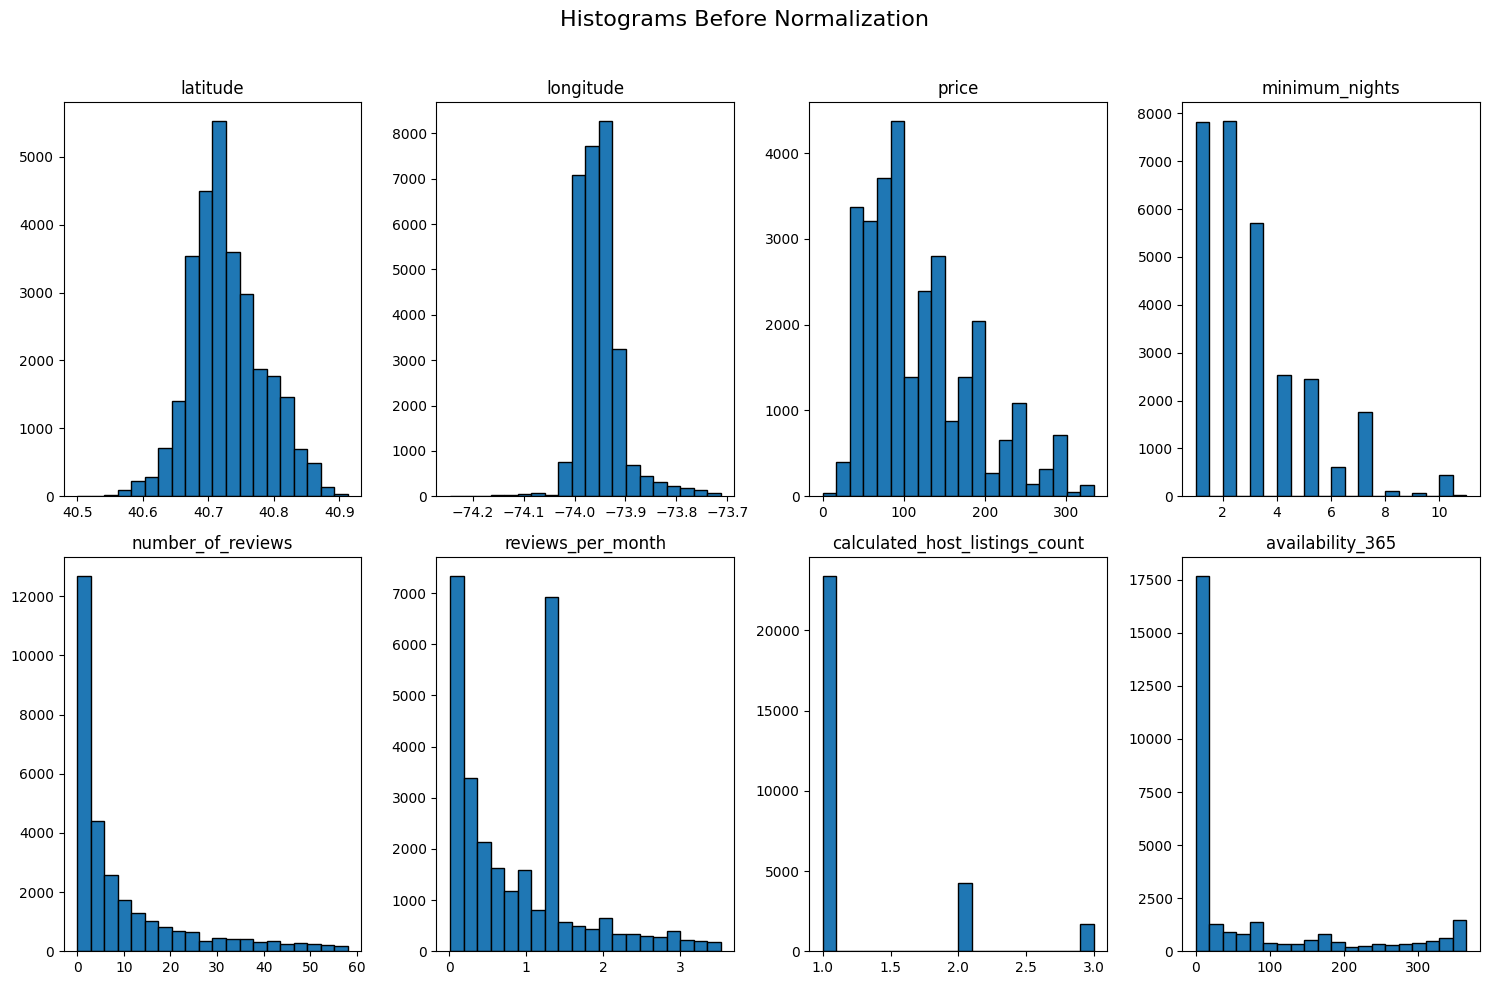

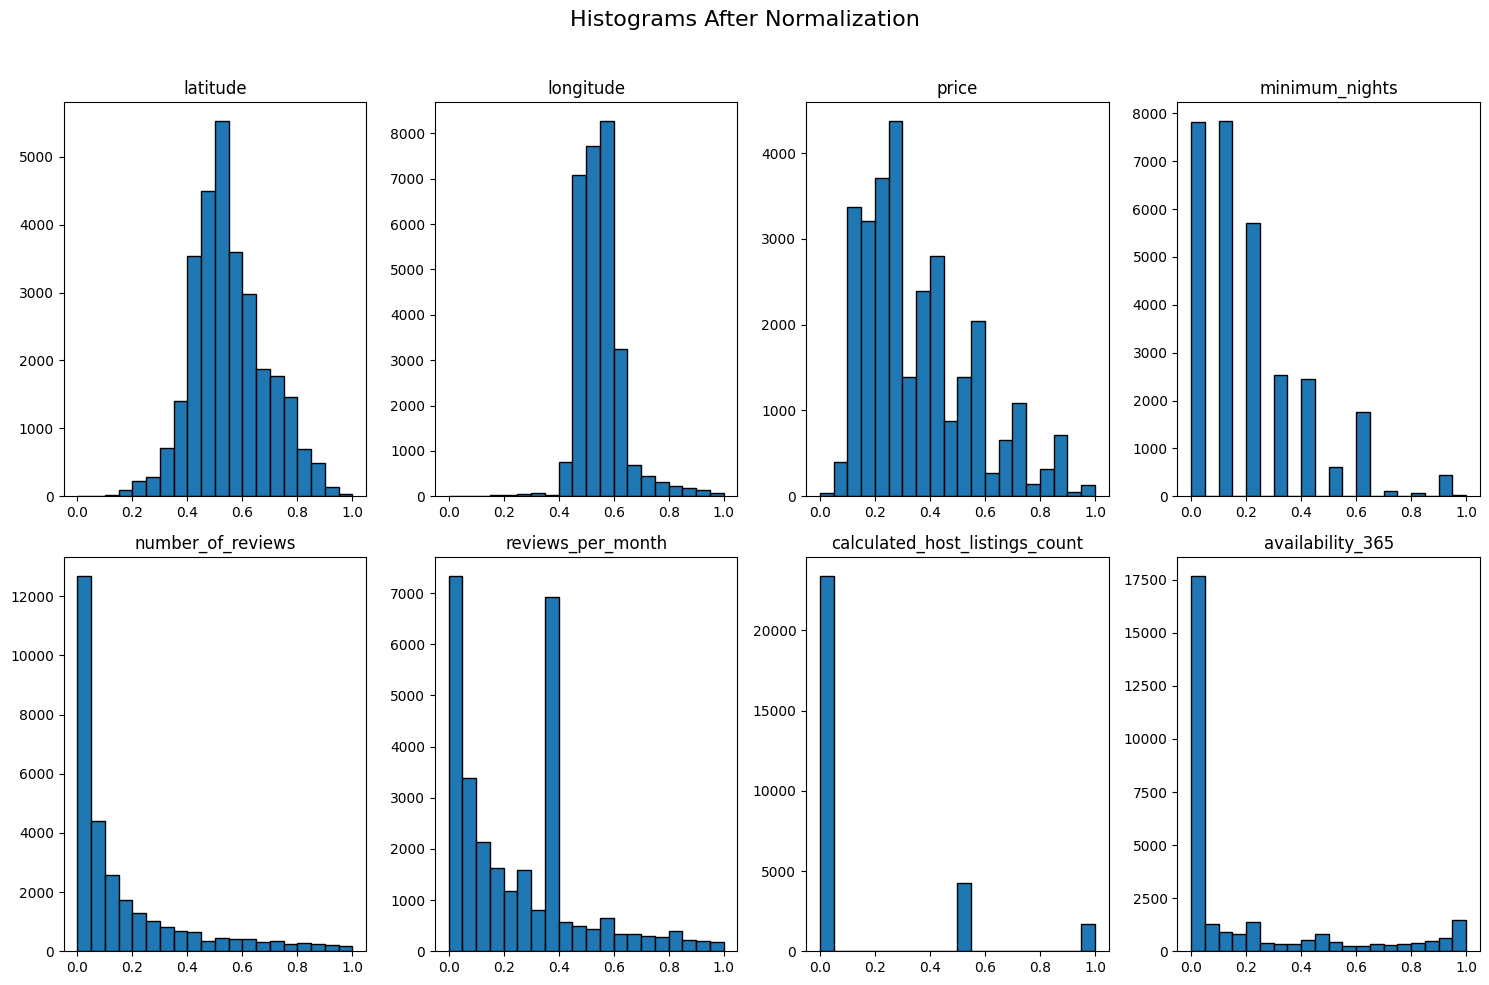

In [23]:
# Select columns for visualization
columns_to_visualize = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                         'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Plot histograms before normalization
plt.figure(figsize=(15, 10))
plt.suptitle('Histograms Before Normalization', fontsize=16)
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 4, i)
    plt.hist(df_no_outliers[column], bins=20, edgecolor='black')
    plt.title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot histograms after normalization
plt.figure(figsize=(15, 10))
plt.suptitle('Histograms After Normalization', fontsize=16)
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 4, i)
    plt.hist(data[column], bins=20, edgecolor='black')
    plt.title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Test and Train

In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
data.shape

(29355, 15)

**Linear Regression**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create a pipeline with the preprocessor and the Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.04698789309701823
R-squared: -0.16743649967282703


**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create a pipeline with the preprocessor and the Decision Tree Regressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0308094656751139
R-squared: 0.2345242062613878


**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create a pipeline with the preprocessor and the Random Forest Regressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.019801221437773988
R-squared: 0.5080292577317465


**Based on the provided metrics, Random Forest appears to outperform Linear Regression and Decision Trees in this regression task. It has the lowest Mean Squared Error and the highest R-squared, indicating better predictive performance. RandomForest is often a good choice for regression tasks due to its ability to capture complex relationships in the data.**

## **Feature Reduction**
Feature reduction methods aim to reduce the number of features in our dataset while preserving the most important information. Here are two common feature reduction methods: Principal Component Analysis (PCA) and Recursive Feature Elimination (RFE).

In [25]:
data.shape

(29355, 15)

#### Principal Component Analysis (PCA):

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Apply TruncatedSVD
num_components = 10  # Set the number of components you want to keep
svd = TruncatedSVD(n_components=num_components)

# Create a pipeline with the preprocessor, TruncatedSVD, and the RandomForestRegressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (with TruncatedSVD): {mse}')
print(f'R-squared (with TruncatedSVD): {r2}')


Mean Squared Error (with TruncatedSVD): 0.021205921253335373
R-squared (with TruncatedSVD): 0.47312882428638914


In [36]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Apply TruncatedSVD
num_components = 10  # Set the number of components you want to keep
svd = TruncatedSVD(n_components=num_components)

# Create a pipeline with the preprocessor, TruncatedSVD, and the Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (with TruncatedSVD): {mse}')
print(f'R-squared (with TruncatedSVD): {r2}')


Mean Squared Error (with TruncatedSVD): 0.023214554351900715
R-squared (with TruncatedSVD): 0.4232233818594564


#### SelectedFromModel:

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Use SelectFromModel with RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
sfm = SelectFromModel(rf)

# Create a pipeline with the preprocessor, SelectFromModel, and the RandomForestRegressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sfm', sfm),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (with SelectFromModel): {mse}')
print(f'R-squared (with SelectFromModel): {r2}')


KeyboardInterrupt: 

In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Use SelectFromModel with Linear Regression
lr = LinearRegression()
sfm = SelectFromModel(lr)

# Create a pipeline with the preprocessor, SelectFromModel, and the Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sfm', sfm),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (with SelectFromModel): {mse}')
print(f'R-squared (with SelectFromModel): {r2}')


Mean Squared Error (with SelectFromModel): 0.040247455529653996
R-squared (with SelectFromModel): 3.2870014793240365e-05


## **Feature Selection**
Feature selection is a crucial step in machine learning, and several methods can be used. We will apply PCA and LDA.

**PCA**

In [40]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for feature selection
num_components = 7  # Set the number of components you want to keep
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a Random Forest model on the transformed data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_pca)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


ValueError: could not convert string to float: 'Bright, Plant-Filled 2 Bedroom in Prospect Park'

**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Discriminant Analysis (LDA) for feature selection
num_components = 1  # Set the number of components you want to keep
lda = LinearDiscriminantAnalysis(n_components=num_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Fit a Random Forest model on the transformed data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_lda)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


## **Feature Extraction**

**PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for feature extraction
num_components = 7  # Set the number of components you want to keep
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a Random Forest model on the transformed data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_pca)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


**LDA**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skdataset.lda import LDA
#pip install scikit-dataset

# Assuming 'data' is your DataFrame
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply LDA for feature extraction
num_components = 1  # Set the number of components you want to keep
lda = LDA(n_components=num_components)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Fit a Random Forest model on the transformed data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_lda)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
